In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
mean=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mean=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
variance=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard, 
                          "Sem": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


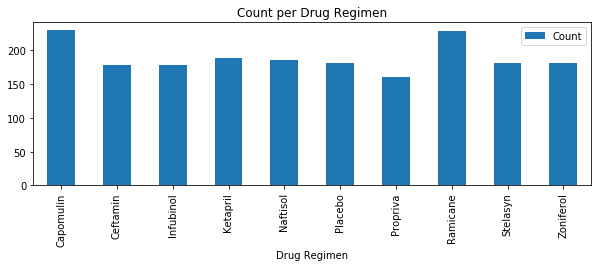

<Figure size 432x288 with 0 Axes>

In [7]:
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
regimen= grouped_df[["Drug Regimen","Mouse ID"]]
regimen=regimen.rename(columns={"Mouse ID": "Count"})
regimen=regimen.set_index("Drug Regimen")
regimen.plot(kind="bar", figsize=(10,3))
plt.title("Count per Drug Regimen")
plt.show()
plt.tight_layout()

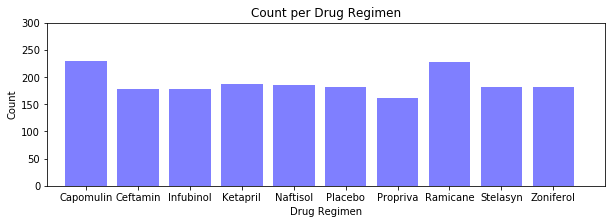

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
import numpy as np
regimen_count = merge_table.groupby(["Drug Regimen"])["Mouse ID"].count()
regimen_count        
y_axis = np.arange(len(regimen_count))
drug_regimens = summary_df.index.tolist()  
plt.figure(figsize=(10,3))
plt.bar(drug_regimens, regimen_count, color='b', alpha=0.5, align="center")
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xlim(-0.75, 10)
plt.ylim(0, 300)
plt.show()

In [ ]:
## Pie plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [10]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


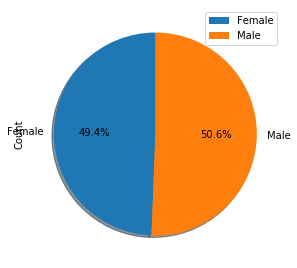

In [11]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=True, labels=gender_df['Sex'])

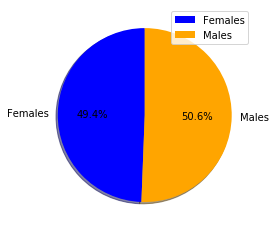

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females", "Males"]
colors = ["blue", "orange"]
plt.pie(gender_df["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(labels,loc="best")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] ==45]
cap_df =max_df.loc[max_df["Drug Regimen"]=='Capomulin']
cap_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [14]:
cap_list = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [15]:
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


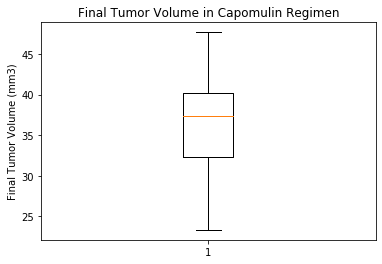

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [17]:
ram_df =max_df.loc[max_df["Drug Regimen"]=='Ramicane']
ram_list = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [18]:
inf_df =max_df.loc[max_df["Drug Regimen"]=='Infubinol']
inf_list = inf_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [19]:
cef_df =max_df.loc[max_df["Drug Regimen"]=='Ceftamin']
cef_list = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


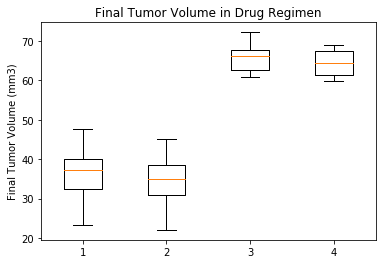

In [20]:
data = [cap_list, ram_list, inf_list,cef_list]
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume in Drug Regimen')
ax2.set_ylabel('Final Tumor Volume (mm3)')
ax2.boxplot(data)

plt.show()

In [23]:
cap_all_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
cap_single_df=cap_all_df.loc[cap_all_df["Mouse ID"] == "b128"]
cap_single_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


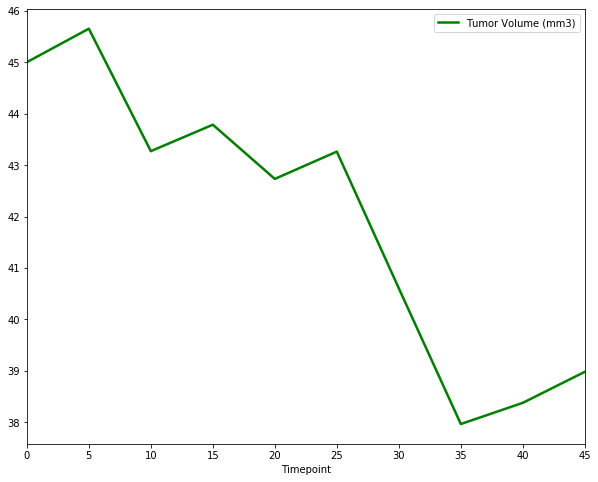

In [24]:
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df = cap_single_df.reset_index(drop=True)
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [26]:
cap_select_df=cap_all_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_select_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [28]:
average_cap = pd.DataFrame(cap_select_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


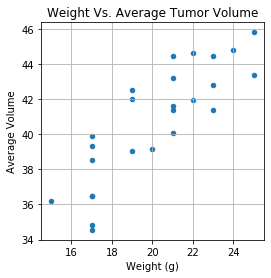

In [29]:
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [30]:
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


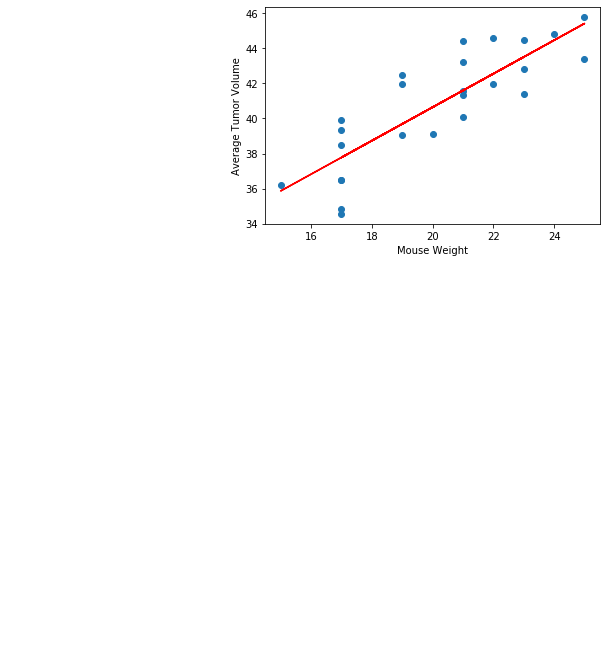

In [37]:
from scipy.stats import linregress
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()